# **Hidden Markov Model**
### **Example : Rainy or Sunny on HMM** 

The example is drawn from the Wikipedia <a ref=https://en.wikipedia.org/wiki/Hidden_Markov_model#A_concrete_example>article</a> on Hidden Markov Models describing what Bob likes to do on rainy or sunny days.

![image-2.png](attachment:image-2.png)

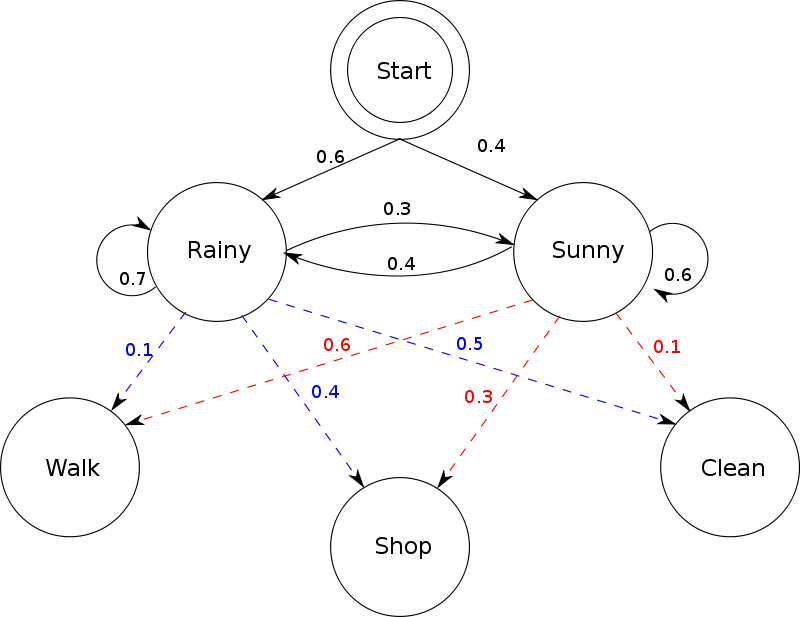

In [3]:
import pomegranate

In [7]:
from pomegranate import HiddenMarkovModel, State, DiscreteDistribution 
import random 
import math

random.seed(0)

- **We First create a `HiddenMarkovModel` object, and name it "Rainy-Sunny"**

In [8]:
model = HiddenMarkovModel(name = "Rainy-Sunny")

- **We then create the two possible states of the model, "Rainy" and "Sunny". In that we will provide the 
  `emission probabilities` of the state** 
- **We make them both as dicrete dustributions, with the possibilities of Bob either walking, shopping, cleaning.**

In [12]:
rainy = State(DiscreteDistribution({'walk':0.1,'shop':0.4,'clean':0.5}),name = "Rainy")
sunny = State(DiscreteDistribution({'walk':0.6,'shop':0.3,'clean':0.1}),name = "sunny")

- We then add **Tranisition Probabolities**, starting with the probability the model starts as sunny or rainy
- We then add the transition matrix. We make sure to **subtract 0.05 from each probability** to add to the probability of exiting the hmm.
- Last, we add transitions to mark the end of the model
- The data does not give us end transition probability. Hence, we have reduced each of the above transition probabilities by 0.05. That way, we will assume the **probabilities as 0.1 for both rainy->end and sunny->end**

In [14]:
# Start state transition to other states
model.add_transition(model.start, rainy, 0.6)
model.add_transition(model.start, sunny, 0.4)

# state to state transitions 
model.add_transition(rainy, rainy, 0.65)
model.add_transition(rainy, sunny, 0.25)
model.add_transition(sunny, sunny, 0.55)
model.add_transition(sunny, rainy, 0.35)

# All state transitions to end state
model.add_transition(rainy, model.end, 0.1)
model.add_transition(sunny, model.end, 0.1)

In [15]:
# Finally, we bake the model to finalizing its structure

In [16]:
model.bake(verbose = True)

- Now lets check on Bob each hour and see what he is doing! In other words lets create a sequence of observations

In [17]:
sequence = ['walk','shop','clean','clean','clean','walk','clean']

In [21]:
# Getting the hidden states for the new observed sequence
def decoding(sequence, model):
    abcd,state_path = model.viterbi(sequence)
    return [state[1].name for state in state_path[1:-1]]

In [22]:
Hidden_tags = decoding(sequence, model)
print(sequence)

['walk', 'shop', 'clean', 'clean', 'clean', 'walk', 'clean']


In [23]:
print(Hidden_tags)

['sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'sunny', 'Rainy']


In [24]:
seq1 = ['walk', 'walk', 'shop', 'walk', 'clean', 'walk', 'shop']

In [25]:
Hidden_tags1 = decoding(seq1, model)
print(sequence)
print(Hidden_tags1)

['walk', 'shop', 'clean', 'clean', 'clean', 'walk', 'clean']
['sunny', 'sunny', 'sunny', 'sunny', 'Rainy', 'sunny', 'sunny']


**Observation:** Here, for 'cleaning' probability is more in rainy than sunny but the results are sunny for clean
 and for shop also the result came sunny(0.3) but more probability is for rainy(0.4) 

In [26]:
abcd, state_path = model.viterbi(sequence)

In [28]:
abcd

-12.707693884908725

In [29]:
state_path

[(2,
  {
      "class" : "State",
      "distribution" : null,
      "name" : "Rainy-Sunny-start",
      "weight" : 1.0
  }),
 (1,
  {
      "class" : "State",
      "distribution" : {
          "class" : "Distribution",
          "dtype" : "str",
          "name" : "DiscreteDistribution",
          "parameters" : [
              {
                  "walk" : 0.6,
                  "shop" : 0.3,
                  "clean" : 0.1
              }
          ],
          "frozen" : false
      },
      "name" : "sunny",
      "weight" : 1.0
  }),
 (0,
  {
      "class" : "State",
      "distribution" : {
          "class" : "Distribution",
          "dtype" : "str",
          "name" : "DiscreteDistribution",
          "parameters" : [
              {
                  "walk" : 0.1,
                  "shop" : 0.4,
                  "clean" : 0.5
              }
          ],
          "frozen" : false
      },
      "name" : "Rainy",
      "weight" : 1.0
  }),
 (0,
  {
      "class" : "State",


In [30]:
state_path[0]

(2,
 {
     "class" : "State",
     "distribution" : null,
     "name" : "Rainy-Sunny-start",
     "weight" : 1.0
 })

In [31]:
state_path[1]

(1,
 {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : [
             {
                 "walk" : 0.6,
                 "shop" : 0.3,
                 "clean" : 0.1
             }
         ],
         "frozen" : false
     },
     "name" : "sunny",
     "weight" : 1.0
 })

In [37]:
state_path[2][1]

{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "walk" : 0.1,
                "shop" : 0.4,
                "clean" : 0.5
            }
        ],
        "frozen" : false
    },
    "name" : "Rainy",
    "weight" : 1.0
}

In [41]:
state_path[1][1].name, state_path[0][1].name

('sunny', 'Rainy-Sunny-start')

In [45]:
abcd, state_path = model.viterbi(sequence)
print([state_path[i][0] for i in range(len(state_path))])
print([state_path[i][1].name for i in range(len(state_path))])
print([state[1].name for state in state_path])

[2, 1, 0, 0, 0, 0, 1, 0, 3]
['Rainy-Sunny-start', 'sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'sunny', 'Rainy', 'Rainy-Sunny-end']
['Rainy-Sunny-start', 'sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'sunny', 'Rainy', 'Rainy-Sunny-end']


In [46]:
state_path

[(2,
  {
      "class" : "State",
      "distribution" : null,
      "name" : "Rainy-Sunny-start",
      "weight" : 1.0
  }),
 (1,
  {
      "class" : "State",
      "distribution" : {
          "class" : "Distribution",
          "dtype" : "str",
          "name" : "DiscreteDistribution",
          "parameters" : [
              {
                  "walk" : 0.6,
                  "shop" : 0.3,
                  "clean" : 0.1
              }
          ],
          "frozen" : false
      },
      "name" : "sunny",
      "weight" : 1.0
  }),
 (0,
  {
      "class" : "State",
      "distribution" : {
          "class" : "Distribution",
          "dtype" : "str",
          "name" : "DiscreteDistribution",
          "parameters" : [
              {
                  "walk" : 0.1,
                  "shop" : 0.4,
                  "clean" : 0.5
              }
          ],
          "frozen" : false
      },
      "name" : "Rainy",
      "weight" : 1.0
  }),
 (0,
  {
      "class" : "State",


In [52]:
from pomegranate import *


In [51]:
# Building the same model line by line
from pomegranate import *
